In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(8982,) (8982,) (2246,) (2246,)


In [6]:
print(max(train_labels), train_labels[:20])

45 [ 3  4  3  4  4  4  4  3  3 16  3  3  4  4 19  8 16  3  3 21]


In [8]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [9]:
# ф-ция для получения текста отзыва
def get_news_text(news_int_vector):
    # word_index - это словарь, каждому слову сопоставляющий числовой индекс
    # https://s3.amazonaws.com/text-datasets/reuters_word_index.json
    word_index = reuters.get_word_index()
    # преобразуем словарь чтобы каждому числовому индексу соответствовало слово
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # We decode the review; note that our indices were offset by 3
    # преобразуем вектор индексов в текст с помощью словаря. Индекс слов имеет смещение 3,
    # т.к. индексы 0, 1 and 2 зарезервированы для "padding", "start of sequence", и "unknown".
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in news_int_vector])
    return decoded_review

In [10]:
get_news_text(train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
import numpy as np

# ф-ция векторизации новостей - преобразования в массив размером 10000
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [13]:
print(x_train.shape, x_train[0][:20])

(8982, 10000) [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]


In [6]:
# собственная реализация преобразования вектора номеров классов в бинарный вектор
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
# использование стандартной функции преобразования метки класса в бинарный вектор (категориальный тип)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
print(one_hot_train_labels.shape, one_hot_train_labels[:5])

(8982, 46) [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # кол-во нейронов в выходном слое = кол-ву классов
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# разделение на обучающую и валидационную выборку
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
# обучение и сохранение результатов
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 390us/step - loss: 2.5238 - acc: 0.4975 - val_loss: 1.7189 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 266us/step - loss: 1.4448 - acc: 0.6891 - val_loss: 1.3498 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 2s 304us/step - loss: 1.0983 - acc: 0.7645 - val_loss: 1.1745 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 2s 289us/step - loss: 0.8723 - acc: 0.8160 - val_loss: 1.0789 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 2s 276us/step - loss: 0.7056 - acc: 0.8480 - val_loss: 0.9861 - val_acc: 0.7850
Epoch 6/20
7982/7982 [==============================] - 2s 274us/step - loss: 0.5685 - acc: 0.8791 - val_loss: 0.9413 - val_acc: 0.8060
Epoch 7/20
7982/7982 [==============================] - 2s 303us/step - loss: 0.4611 - acc: 0.9033 - val_loss: 0.9102 - val_acc: 0.8030


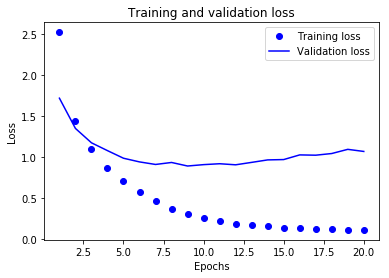

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
min(history.history['val_loss'])

0.8911306042671203

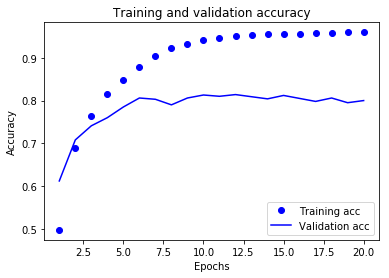

In [25]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 3s 341us/step - loss: 2.8044 - acc: 0.5038 - val_loss: 1.8419 - val_acc: 0.6310
Epoch 2/8
7982/7982 [==============================] - 2s 262us/step - loss: 1.5295 - acc: 0.6948 - val_loss: 1.3372 - val_acc: 0.7080
Epoch 3/8
7982/7982 [==============================] - 2s 261us/step - loss: 1.1160 - acc: 0.7689 - val_loss: 1.1404 - val_acc: 0.7480
Epoch 4/8
7982/7982 [==============================] - 2s 263us/step - loss: 0.8744 - acc: 0.8151 - val_loss: 1.0312 - val_acc: 0.7840
Epoch 5/8
7982/7982 [==============================] - 2s 294us/step - loss: 0.7050 - acc: 0.8475 - val_loss: 0.9690 - val_acc: 0.8020
Epoch 6/8
7982/7982 [==============================] - 2s 270us/step - loss: 0.5674 - acc: 0.8755 - val_loss: 0.9419 - val_acc: 0.7980
Epoch 7/8
7982/7982 [==============================] - 2s 271us/step - loss: 0.4573 - acc: 0.9069 - val_loss: 0.9238 - val_acc: 0.7990
Epoch 8

In [27]:
results

[1.0273448684230406, 0.7671415850931474]

In [28]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19679430097951914

In [29]:
predictions = model.predict(x_test)

In [30]:
predictions[0].shape

(46,)

In [35]:
predictions[:5]

array([[3.82024991e-05, 1.78306673e-05, 5.83891165e-07, 9.98285472e-01,
        6.25412387e-04, 5.34379751e-07, 9.14283282e-06, 8.24640938e-06,
        1.63516786e-04, 6.24634458e-06, 8.50677498e-06, 2.17489705e-05,
        1.59012670e-05, 5.62853929e-05, 7.28233908e-06, 4.74794570e-06,
        2.57755237e-05, 1.55640168e-06, 2.75208436e-07, 3.89845918e-05,
        1.84502191e-04, 1.66306738e-04, 9.95002324e-07, 3.44623295e-05,
        6.84914085e-06, 1.78239259e-06, 5.15297870e-07, 3.56951568e-06,
        3.85270414e-06, 8.04993670e-06, 1.07915830e-05, 1.18998098e-04,
        1.08006270e-06, 3.07470941e-06, 4.70756786e-05, 2.79142995e-07,
        2.92764871e-05, 1.85806186e-06, 5.21615993e-06, 2.72501220e-05,
        1.03443988e-07, 2.15138084e-06, 1.00664761e-06, 4.45245360e-06,
        5.12657579e-08, 3.19440147e-07],
       [5.83155034e-03, 1.19579576e-01, 1.73321776e-02, 2.04518763e-03,
        6.07251888e-04, 3.47936712e-02, 1.18853222e-03, 2.56298401e-04,
        1.61715376e-04,

In [31]:
np.sum(predictions[0])

1.0000002

In [32]:
np.argmax(predictions[0])

3